In [501]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
import re

In [502]:
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')
print(train_data.head())
# print(train_data[::20])

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [503]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [504]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [505]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

array([[<Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Survived'}>]], dtype=object)

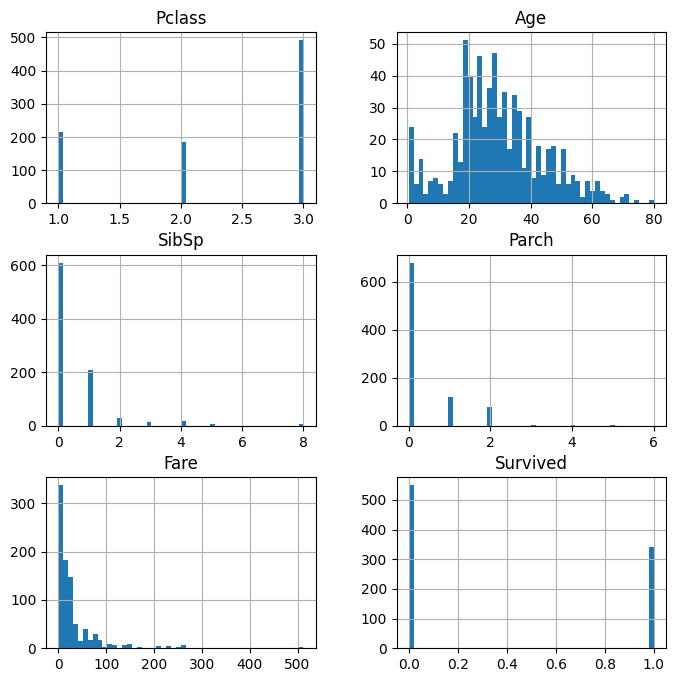

In [506]:
hist_data = train_data[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare', 'Survived']]
hist_data.hist(bins=50, figsize=(8,8))

<Axes: >

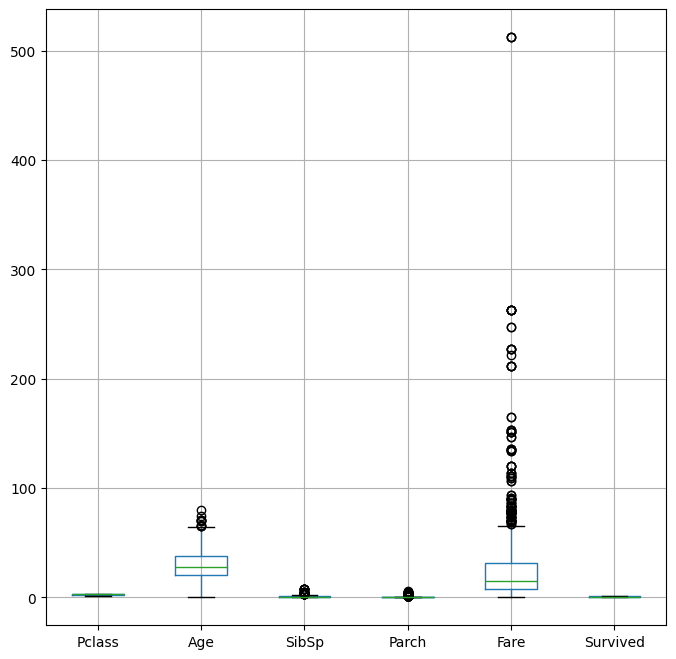

In [507]:
boxplot_data = train_data[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]
boxplot_data.boxplot(figsize=(8,8))

Sex
male      577
female    314
Name: count, dtype: int64

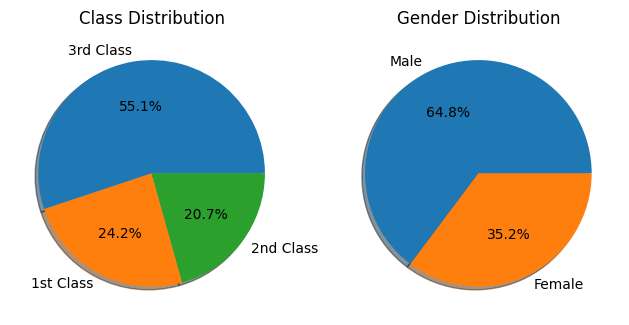

In [508]:
fig, ax = plt.subplots(1,2)

pclass_count = train_data['Pclass'].value_counts()

ax[0].pie(pclass_count, labels=['3rd Class', '1st Class', '2nd Class'], autopct='%1.1f%%', shadow=True)
ax[0].set_title('Class Distribution')
plt.tight_layout()
pclass_count

sex_count = train_data['Sex'].value_counts()

ax[1].pie(sex_count, labels=['Male', 'Female'], autopct='%1.1f%%', shadow=True)
ax[1].set_title('Gender Distribution')
plt.tight_layout()
sex_count

# sibsp_count = train_data['SibSp'].value_counts()

# ax[1][1].bar(sibsp_count.index, sibsp_count.values)
# ax[1][1].set_title('Siblings/Spouse Distribution')
# plt.tight_layout()
# sibsp_count


# parch_count = train_data['Parch'].value_counts()

# ax[2][0].bar(parch_count.index, parch_count.values)
# ax[2][0].set_title('Parent/Children Distribution')
# plt.tight_layout()
# parch_count




Survived
0    549
1    342
Name: count, dtype: int64

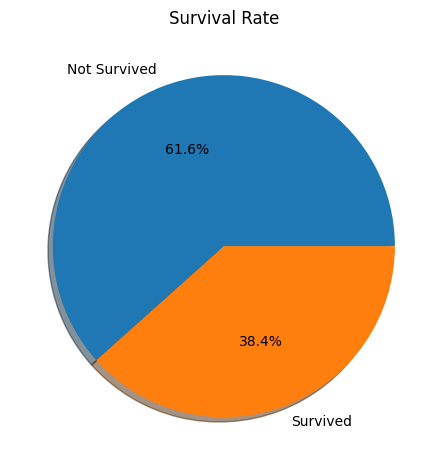

In [509]:
fig, ax = plt.subplots()

survival_count = train_data['Survived'].value_counts()

ax.pie(survival_count, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', shadow=True)
ax.set_title('Survival Rate')
plt.tight_layout()
survival_count

In [510]:
# drop columns that are not useful
print(train_data['Ticket'].value_counts())
print(train_data['Name'].value_counts())
train_data = train_data.drop(columns=['Name', 'Ticket'])
train_data

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


In [511]:
# decide not to impute
cabin_count = train_data['Cabin'].value_counts().sort_index()
# cabin_count = train_data['Cabin'].value_counts()
print(cabin_count[::10])
# print(cabin_count.tail())

def extract_cabin_letter(cabin):
    if pd.isna(cabin):
        return np.nan

    match = re.search(r'^([A-GT])*+', str(cabin))
    if match:
        return match.group(1)
    else:
        return np.nan

train_data['Cabin'] = train_data['Cabin'].apply(extract_cabin_letter)
train_data['Cabin'].value_counts().sort_index()

Cabin
A10      1
A34      1
B22      2
B42      1
B77      2
C104     1
C148     1
C50      1
C83      2
D        3
D30      1
D50      1
E24      2
E49      1
F G73    2
Name: count, dtype: int64


Cabin
A    15
B    47
C    59
D    33
E    32
F    13
G     4
T     1
Name: count, dtype: int64

In [ ]:
# decide not to impute
cabin_mode = train_data['Cabin'].mode()[0]
train_data['Cabin_impute'] = train_data['Cabin'].fillna(cabin_mode)
train_data['Cabin_impute'].value_counts().sort_index()


Text(0.5, 1.0, 'Cabin Distribution after Imputation')

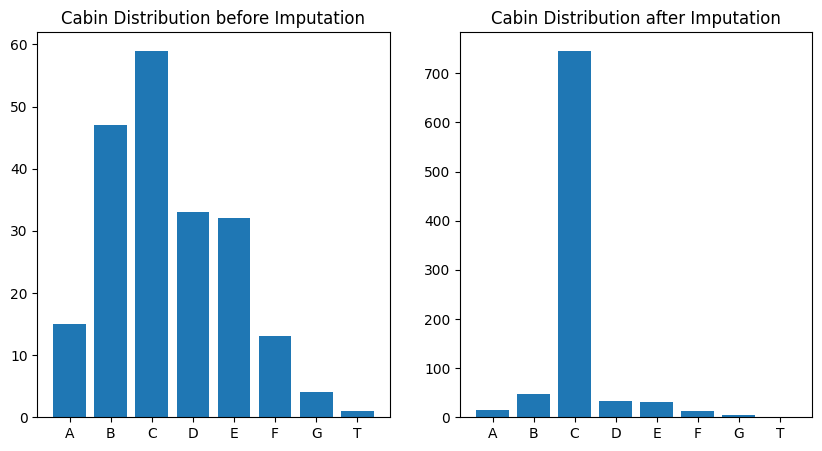

In [522]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

cabin_count = train_data['Cabin'].value_counts().sort_index()
ax[0].bar(cabin_count.index, cabin_count.values)
ax[0].set_title('Cabin Distribution before Imputation')


cabin_inputed_count = train_data['Cabin_impute'].value_counts().sort_index()
ax[1].bar(cabin_inputed_count.index, cabin_inputed_count.values)
ax[1].set_title('Cabin Distribution after Imputation')


In [513]:
embark_count = train_data['Embarked'].value_counts()

ax[1][0].pie(embark_count, labels=['S', 'C', 'Q'], autopct='%1.1f%%', shadow=True)
ax[1][0].set_title('Embarked Distribution')
plt.tight_layout()

TypeError: 'Axes' object is not subscriptable